# **Figure 8.** Gas turbulence
| Author  | Stanley A. Baronett |
|---------|---------------------|
| Created | 04/20/2022          |
| Updated | 05/31/2023          |

## Reynolds stress

Ignoring the Maxwell (magnetic) stress tensor for purely hydrodynamic (unmagnetized) disks, the outward component of the angular momentum flux (turbulent transport) is the dominant $r\phi$ component (in cylindrical coordinates) of the Reynolds (velocity) stress tensor [(Baulbus & Hawley, 1998, Eq. 37)](https://doi.org/10.1103/RevModPhys.70.1)
\begin{equation}
    W_{r\phi} \equiv \langle u_ru_\phi\rangle_\rho,
    \tag{37*}
\end{equation}
where
\begin{equation}
    \langle u_ru_\phi\rangle_\rho = \frac{1}{2\pi\Sigma\Delta r}\int u_ru_\phi\rho\,\mathrm{d}\phi\,\mathrm{d}r\,\mathrm{d}z,
    \tag{36*}
\end{equation}
and $\Sigma = \int_{-\infty}^\infty\rho\,\mathrm{d}z$ is the gas surface density.
The *fluctuation velocity* $\mathbf{u}$ is the difference between the fluid velocity $\mathbf{v}$ and the azimuthal circular velocity $r\Omega$, where
\begin{equation}
    u_r = v_r,\quad u_\phi = v_\phi-r\Omega,\quad u_z = v_z.
    \tag{31}
\end{equation}


### Modification for the streaming instability

The above definitions from [Baulbus & Hawley (1998)](https://doi.org/10.1103/RevModPhys.70.1) are not specific enough for our scenario during the saturated state which includes dust feedback to the gas and a radial pressure gradient.
Thus, we must calculate the mass-weighted average gas velocity deviations from the initial equilibrium velocity $\mathbf{u}_0$ [(Nakagawa-Sekiya-Hayashi, 1986)](https://ui.adsabs.harvard.edu/abs/1986Icar...67..375N/abstract) as
\begin{equation*}
    \Delta\mathbf{u} \equiv \frac{\langle\rho_\mathrm{g}\delta\mathbf{u}\rangle}{\langle\rho_\mathrm{g}\rangle},
\end{equation*}
where $\delta\mathbf{u} \equiv \mathbf{u} - \mathbf{u}_0$ and the average gas density $\langle\rho_\mathrm{g}\rangle = \rho_\mathrm{g,0} = 1$, the initially uniform gas density field in our models.
After transforming global coordinates $r$ and $\phi$ to $x$ and $y$, respectively, in the local-shearing-box approximation [(Goldreich & Lynden-Bell, 1965)](https://ui.adsabs.harvard.edu/abs/1965MNRAS.130..125G/abstract),
\begin{align*}
    W_{xy} &\equiv \langle\rho_\mathrm{g}(\delta u_x - \Delta u_x)(\delta u_y - \Delta u_y)\rangle \\
    &= \langle\rho_\mathrm{g}\delta u_x\delta u_y\rangle - \Delta u_y\langle\rho_\mathrm{g}\delta u_x\rangle - \Delta u_x\langle\rho_\mathrm{g} \delta u_y\rangle + \Delta u_x\Delta u_y\langle\rho_\mathrm{g}\rangle \\
    &= \langle\rho_\mathrm{g}\delta u_x\delta u_y\rangle - \frac{\langle\rho_\mathrm{g}\delta u_y\rangle\langle\rho_\mathrm{g}\delta u_x\rangle}{\langle\rho_\mathrm{g}\rangle} - \frac{\langle\rho_\mathrm{g}\delta u_x\rangle\langle\rho_\mathrm{g} \delta u_y\rangle}{\langle\rho_\mathrm{g}\rangle} + \frac{\langle\rho_\mathrm{g}\delta u_x\rangle\langle\rho_\mathrm{g} \delta u_y\rangle}{\langle\rho_\mathrm{g}\rangle} \\
    &= \langle\rho_\mathrm{g}\delta u_x\delta u_y\rangle - \frac{\langle\rho_\mathrm{g}\delta u_y\rangle\langle\rho_\mathrm{g}\delta u_x\rangle}{\langle\rho_\mathrm{g}\rangle} \\
    &= \langle\delta u_x\delta u_y\rangle - \langle\delta u_y\rangle\langle\delta u_x\rangle,
\end{align*}
where,
\begin{equation*}
    \langle f \rangle \equiv \frac{1}{L_x L_y L_z}\int\int\int f\mathrm{d}x\mathrm{d}y\mathrm{d}z
\end{equation*}
is the volume average of time-varying quantity $f$ over the computational domain $L_x L_y L_z = V$.
Note $M_\mathrm{g} = \langle\rho_\mathrm{g}\rangle V$ is the total mass of the gas.


### $\alpha$ parameter

From [Baulbus & Hawley (1998)](https://doi.org/10.1103/RevModPhys.70.1), Eq. 48,
\begin{equation*}
    W_{r\phi} = \alpha c_\mathrm{s}^2
    \tag{48}
\end{equation*}
where $c_\mathrm{s}$ is the sound speed.

### Athena++ `SI.hst` Outputs
- Reuse the history file's existing `dux` and `duy` columns from the `Dux()` and `Duy()` problem generator (pgen) functions.
  - `src/pgen/streaming_instability.cpp`, lines 95-121:
    ```cpp
    //======================================================================================
    //! \fn Real Dux(MeshBlock *pmb, int iout)
    //  \brief Finds the first moment of the radial velocity deviation of the gas.
    //======================================================================================
    Real Dux(MeshBlock *pmb, int iout)
    {
        ...
              integral += rho(k,j,i) * (ux(k,j,i) - ux0) * pcoord->GetCellVolume(k,j,i);
        
        // Return the moment.
        return integral;
    }
    ```
  - $\langle\delta u_x\rangle =$ `dux`$/M_\mathrm{g}$
  - [x] Check if `ux0` and `uy0` equal first line under `1-mom` and `3-mom`, respectively
    ``` cpp
    // Find the Nakagawa-Sekiya-Hayashi (1986) equilibrium solution.
    Real taus(omega * DustParticles::GetStoppingTime());
    Real v(duy0 / (std::pow(1.0 + epsilon, 2) + std::pow(taus, 2)));
    ux0 = 2.0 * epsilon * taus * v;
    uy0 = -((1.0 + epsilon) + std::pow(taus, 2)) * v;
    ```
- Add and enroll `DuxDuy()` to the pgen for a new `duxduy` history column.
  - `src/pgen/streaming_instability.cpp`, lines 211-242:  
    ```cpp
    //======================================================================================
    //! \fn Real DuxDuy(MeshBlock *pmb, int iout)
    //  \brief Finds the product of the first moments of the radial and azimuthal velocity
    //         deviations of the gas.
    //======================================================================================
    Real DuxDuy(MeshBlock *pmb, int iout)
    {
            ...
            Real dux(ux(k,j,i) - ux0);
            Real duy(uy(k,j,i) - uy0);
            integral += rho(k,j,i) * (dux * duy) * pcoord->GetCellVolume(k,j,i);
          }

    // Return the product of the moments.
    return integral;
    }
    ```
  - $\langle\delta u_x\delta u_y\rangle = $`duxduy`$/M_\mathrm{g}$ 

/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


,Case,Dir,a,a_f.e.,k,k_f.e.
0,AB,x,0.19,± 5%,0.96,± 1%
1,AB,z,0.11,± 12%,0.92,± 3%
2,BA,x,0.27,± 17%,1.06,± 4%
3,BA,z,0.34,± 17%,0.72,± 7%


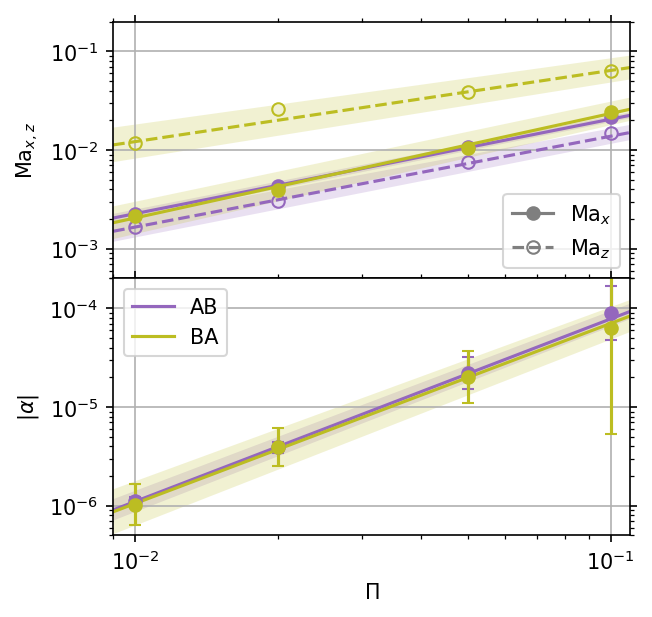

In [1]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

Ma_ylim, alpha_ylim = (5e-4, 2e-1), (5e-7, 2e-4)
Ma_ydiff = np.log10(Ma_ylim[1]) - np.log10(Ma_ylim[0])
alpha_ydiff = np.log10(alpha_ylim[1]) - np.log10(alpha_ylim[0])
h_ratio = Ma_ydiff/alpha_ydiff
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(4.45, 4.45), dpi=150,
                        height_ratios=[h_ratio, 1])
workdir = '../unstrat'
cases = [['AB', 'tab:purple',  5], # [case, line style, t_sat]
         ['BA', 'tab:olive', 150]]
Pis = [0.01, 0.02, 0.05, 0.1]
res = '2048'
dirs = [['x', 'dux',   'dux2', 1, 'full', 'solid'],
        ['z', '2-mom', '2-KE', 2, 'none', 'dashed']]
pow_law = lambda x, a, k : a*x**k
lin_fit = lambda x, b, m : m*x + b
xs = np.linspace(9e-3, 1.1e-1)
tab3_cases, tab3_Pis, tab3_xs,  tab3_zs = [], [], [], []

# Turbulent Mach number variables
avgMas = np.zeros((len(Pis), len(dirs)))
std_prelogMas = np.zeros((len(Pis), len(dirs)))
avg_logMas = np.zeros((len(Pis), len(dirs)))
std_logMas = np.zeros((len(Pis), len(dirs)))
Ma_yerrs = np.zeros((2, len(Pis), len(dirs)))
Ma_runs, tdirs = [], []
Ma_as, Ma_a_ferrs = [], []
Ma_ks, Ma_k_ferrs = [], []
# Ma_a_plus, Ma_a_minus = [], []

# Turbulent alpha variables
avg_alphas = np.zeros(len(Pis))
std_prelog_alphas = np.zeros(len(Pis))
avg_log_alphas = np.zeros(len(Pis))
std_log_alphas = np.zeros(len(Pis))
alpha_yerrs = np.zeros((2, len(Pis)))
alpha_cases = []
alpha_as, alpha_a_ferrs = [], []
alpha_ks, alpha_k_ferrs = [], []
# alpha_a_plus, alpha_a_minus = [], []

for case in cases:
    axs[1].plot([], [], color=case[1], label=case[0])
    # print(f'{case[0]:s}/0.05')

    for i, dir in enumerate(dirs):
        for j, Pi in enumerate(Pis):
            # Collect sim parameters, history file
            path = f'{workdir}/{case[0]}/{Pi:.2f}/{res}'
            athinput = athena_read.athinput(f'{path}/athinput.si')
            hst = athena_read.hst(f'{path}/output/SI.hst')
            c_s = athinput['hydro']['iso_sound_speed']
            i_sat = int(case[2]/athinput['output3']['dt'])
            Mg = hst['mass']

            # Compute turbulent Mach numbers
            dispersions = np.sqrt(dir[3]*hst[dir[2]]/Mg - (hst[dir[1]]/Mg)**2)
            Mas = dispersions[i_sat:]/c_s
            avgMas[j, i] = np.average(Mas)
            std_prelogMas[j, i] = np.std(Mas)
            logMas = np.log(Mas)
            avg_logMas[j, i] = np.average(logMas)
            std_logMas[j, i] = np.std(logMas)
            # if Pi == 0.05:
            #     print(f'\tMa_{dir[0]} = {avgMas[j, i]:.2e} ± {std_prelogMas[j, i]:.0e}')
            if dir[0] == 'z':
                tab3_cases.append(case[0])
                tab3_Pis.append(Pi)
                tab3_zs.append(avgMas[j, i])
            else:
                tab3_xs.append(avgMas[j, i])

            # Compute Reynolds stress and turbulent alpha
                dux = hst['dux']/Mg
                duy = hst['duy']/Mg
                duxduy = hst['duxduy']/Mg
                # if Pi == 0.05:                                  # Diagnostics
                #     print(f'\n\tδu_xδu_y = {duxduy[i_sat]:.1e}')
                #     print(f'\tδu_x = {dux[i_sat]:.1e}')
                #     print(f'\tδu_y = {duy[i_sat]:.1e}')
                #     print(f'\tδu_y*δu_x = {duy[i_sat]*dux[i_sat]:.1e}')
                Wxy = (duxduy - duy*dux)
                Wxy = Wxy[i_sat:]
                alphas = Wxy/c_s**2
                avg_alphas[j] = np.average(alphas)
                std_prelog_alphas[j] = np.std(alphas)
                log_alphas = np.log(np.abs(alphas))
                avg_log_alphas[j] = np.average(log_alphas)
                std_log_alphas[j] = np.std(log_alphas)

        # Fit and plot turbulent Mach numbers
        sigma3 = np.exp(3*std_logMas)
        Ma_yerrs[0] = avgMas/sigma3 - avgMas
        Ma_yerrs[1] = avgMas*sigma3 - avgMas
        popt, pcov = curve_fit(lin_fit, np.log(Pis), avg_logMas[:, i],
                               sigma=std_logMas[:, i])
        perr = np.sqrt(np.diag(pcov))
        a, k = np.exp(popt[0]), popt[1]
        a_err, k_err = perr[0], perr[1]
        sigma1 = np.exp(perr[0])
        fit_high = pow_law(xs, a*sigma1, k - k_err)
        fit_low = pow_law(xs, a/sigma1, k + k_err)
        axs[0].plot(Pis, avgMas[:, i], marker='o', ls='none', color=case[1],
                       fillstyle=dir[4])
        axs[0].plot(xs, pow_law(xs, a, k), ls=dir[5], color=case[1])
        axs[0].fill_between(xs, fit_high, fit_low, color=case[1], ec=None,
                            alpha=0.2)
        Ma_runs.append(case[0]); tdirs.append(dir[0])
        Ma_as.append(a); Ma_a_ferrs.append(a_err)
        # Ma_a_plus.append(a*sigma1 - a); Ma_a_minus.append(a/sigma1 - a)
        Ma_ks.append(k); Ma_k_ferrs.append(k_err/k)

    # Fit and plot turbulent alpha
    sigma3 = np.exp(3*std_log_alphas)
    alpha_yerrs[0] = avg_alphas/sigma3 - avg_alphas
    alpha_yerrs[1] = avg_alphas*sigma3 - avg_alphas
    popt, pcov = curve_fit(lin_fit, np.log(Pis), avg_log_alphas,
                           sigma=std_log_alphas)
    perr = np.sqrt(np.diag(pcov))
    a, k = np.exp(popt[0]), popt[1]
    a_err, k_err = perr[0], perr[1]
    sigma1 = np.exp(perr[0])
    fit_high = pow_law(xs, a*sigma1, k - k_err)
    fit_low = pow_law(xs, a/sigma1, k + k_err)
    axs[1].errorbar(Pis, np.abs(avg_alphas), yerr=np.abs(alpha_yerrs), fmt='o',
                    color=case[1], capsize=3)
    axs[1].plot(xs, np.abs(pow_law(xs, a, k)), color=case[1])
    axs[1].fill_between(xs, np.abs(fit_low), np.abs(fit_high), color=case[1],
                        ec=None, alpha=0.2)
    alpha_cases.append(case[0])
    alpha_as.append(a); alpha_a_ferrs.append(a_err)
    # alpha_a_plus.append(a*sigma1 - a); alpha_a_minus.append(a/sigma1 - a)
    alpha_ks.append(k); alpha_k_ferrs.append(k_err/k)

# For df3, s3 diagnostics
tab3_xzs = np.asarray(tab3_xs)/np.asarray(tab3_zs)

# Plot line style ghost points; format plots and legend
axs[0].plot([], [], color='tab:gray', label='Ma$_x$', marker='o')
axs[0].plot([], [], color='tab:gray', ls='--', label='Ma$_z$', marker='o',
            fillstyle='none')
axs[0].set(ylabel=r'Ma$_{x,z}$', ylim=Ma_ylim, yscale='log')
axs[0].legend(loc='lower right')
axs[1].set(xlabel=r'$\Pi$', ylabel=r'$|\alpha|$', xlim=(9e-3, 1.1e-1),
           ylim=alpha_ylim)
axs[1].legend(loc='upper left')

for ax in axs.flat:
    ax.grid()
    ax.set(xscale='log', yscale='log')
    ax.tick_params(which='both', top=True, right=True)

plt.subplots_adjust(hspace=0)
plt.savefig('figs/gas_turbulence.pdf', bbox_inches='tight', pad_inches=0.01)
plt.savefig('figs/png/gas_turbulence.png', bbox_inches='tight', pad_inches=0.01, dpi=1200)


df1 = pd.DataFrame({
    'Case'   : Ma_runs,
    'Dir'    : tdirs,
    'a'      : Ma_as,
    'a_f.e.' : Ma_a_ferrs,
    'k'      : Ma_ks,
    'k_f.e.' : Ma_k_ferrs,})
s1 = df1.style.format({
    'a'      : '{:.2f}',
    'a_f.e.' : '± {:.0%}',
    'k'      : '{:.2f}',
    'k_f.e.' : '± {:.0%}',})

df2 = pd.DataFrame({
    'Case'   : alpha_cases,
    'a'      : alpha_as,
    'a_f.e.' : alpha_a_ferrs,
    'k'      : alpha_ks,
    'k_f.e.' : alpha_k_ferrs,})
s2 = df2.style.format({
    'a'      : '{:.2e}',
    'a_f.e.' : '± {:.0%}',
    'k'      : '{:.2f}',
    'k_f.e.' : '± {:.0%}',})

# df1 = pd.DataFrame({
#     'Case' : Ma_runs,
#     'Dir'  : tdirs,
#     'a'    : Ma_as,
#     '+σₐ'  : Ma_a_plus,
#     '-σₐ'  : Ma_a_minus,
#     'k'    : Ma_ks,
#     '±σₖ'  : Ma_k_ferrs,})
# s1 = df1.style.format({
#     'a'    : '{:.3f}',
#     '+σₐ'  : '({:.1e})',
#     '-σₐ'  : '({:.1e})',
#     'k'    : '{:.2f}',
#     '±σₖ'  : '({:.0e})',})

# df2 = pd.DataFrame({
#     'Case' : alpha_cases,
#     'a'    : alpha_as,
#     '+σₐ'  : alpha_a_plus,
#     '-σₐ'  : alpha_a_minus,
#     'k'    : alpha_ks,
#     '±σₖ'  : alpha_k_ferrs,})
# s2 = df2.style.format({
#     'a'    : '{:.2e}',
#     '+σₐ'  : '({:.1e})',
#     '-σₐ'  : '({:.1e})',
#     'k'    : '{:.2f}',
#     '±σₖ'  : '({:.0e})',})

df3 = pd.DataFrame({
    'Case' : tab3_cases,
    'Π'    : tab3_Pis,
    'x'    : tab3_xs,
    'z'    : tab3_zs,
    'x/z'  : tab3_xzs,
    })
s3 = df3.style.format({
    'Π'    : '{:.2f}',
    'x'    : '{:.2e}',
    'z'    : '{:.2e}',
    'x/z'  : '{:.1%}',})

s1
# s2
# s3

In [ ]:
print('AB')
avg_xzs = np.average(tab3_xzs[:4] - 1)
std_xzs = np.std(tab3_xzs[:4] - 1)
print(f'x/z = {avg_xzs:.1%} ± {std_xzs:.1%}')

print('\nBA')
print(f'z/x = {1/tab3_xzs[4:]}')
avg_xzs = np.average(1/tab3_xzs[4:])
std_xzs = np.std(1/tab3_xzs[4:])
print(f'    = {avg_xzs:.1f} ± {std_xzs:.1f}')

AB
x/z = 40.6% ± 2.8%

BA
z/x = [5.49657709 6.56353167 3.71584416 2.58278784]
    = 4.6 ± 1.5


### $\alpha_z$

From Dullemond et al. ([2018](https://ui.adsabs.harvard.edu/abs/2018ApJ...869L..46D/abstract), eq.~41),
\begin{align}
    D_\mathrm{g} &= \frac{\nu}{\mathrm{Sc}} = \alpha\frac{c_\mathrm{s}^2}{\mathrm{Sc}\Omega_\mathrm{K}} \\
    \frac{D_\mathrm{g}}{c_\mathrm{s}H_\mathrm{g}} &= \alpha \mathrm{Sc}.
\end{align}
Including the $\tau_\mathrm{s} \ll 1$ limit where orbital effects are negligible, from Youdin & Lithwick ([2007](https://ui.adsabs.harvard.edu/abs/2007Icar..192..588Y/abstract), eq.~5),
\begin{align}
    \mathrm{Sc} &\equiv \frac{D_\mathrm{g}}{D_\mathrm{p}} \sim 1 + \tau_\mathrm{s}^2 \\
    D_\mathrm{g} &= D_\mathrm{p}\mathrm{Sc}
\end{align}
to order unity agreement with the precise result for radial diffusion.
Since we individually measure the radial and vertical components of the particle diffusion coefficient $D_{\mathrm{p},x,z}$, we can simultaneously define
\begin{align}
    \alpha_z &\equiv \frac{D_{\mathrm{g},z}\mathrm{Sc}\Omega_\mathrm{K}}{c_\mathrm{s}^2} \\
    &= \frac{D_{\mathrm{p},z}\mathrm{Sc}^2\Omega_\mathrm{K}}{c_\mathrm{s}^2} \\
    &= \frac{D_{\mathrm{p},z}\Omega_\mathrm{K}}{c_\mathrm{s}^2}(1 + \tau_\mathrm{s})^2 \\
    &= \frac{D_{\mathrm{p},z}\Omega_\mathrm{K}}{c_\mathrm{s}^2}(1 + \tau_\mathrm{s})^2
\end{align}

/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


,Case,Dir,a,a_f.e.,k,k_f.e.
0,AB,x,0.19,± 5%,0.96,± 1%
1,AB,z,0.11,± 12%,0.92,± 3%
2,BA,x,0.27,± 17%,1.06,± 4%
3,BA,z,0.34,± 17%,0.72,± 7%


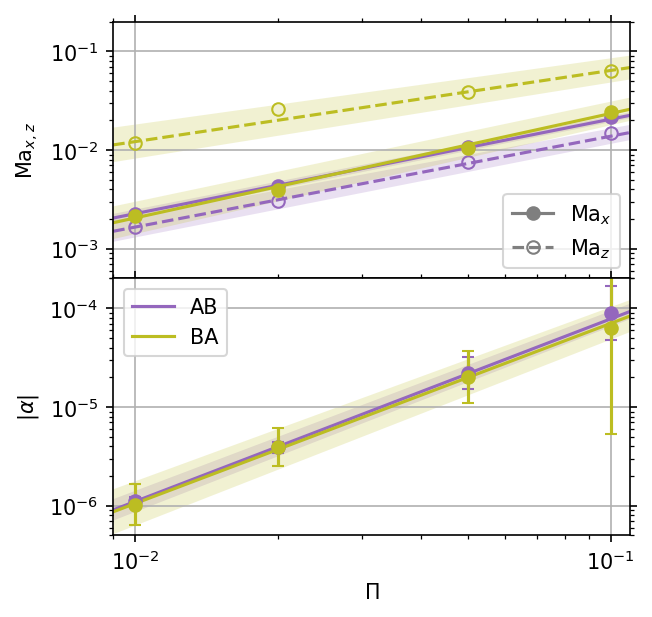

In [ ]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

Ma_ylim, alpha_ylim = (5e-4, 2e-1), (5e-7, 2e-4)
Ma_ydiff = np.log10(Ma_ylim[1]) - np.log10(Ma_ylim[0])
alpha_ydiff = np.log10(alpha_ylim[1]) - np.log10(alpha_ylim[0])
h_ratio = Ma_ydiff/alpha_ydiff
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(4.45, 4.45), dpi=150,
                        height_ratios=[h_ratio, 1])
workdir = '../unstrat'
cases = [['AB', 'tab:purple',  5], # [case, line style, t_sat]
         ['BA', 'tab:olive', 150]]
Pis = [0.01, 0.02, 0.05, 0.1]
res = '2048'
dirs = [['x', 'dux',   'dux2', 1, 'full', 'solid'],
        ['z', '2-mom', '2-KE', 2, 'none', 'dashed']]
pow_law = lambda x, a, k : a*x**k
lin_fit = lambda x, b, m : m*x + b
xs = np.linspace(9e-3, 1.1e-1)
tab3_cases, tab3_Pis, tab3_xs,  tab3_zs = [], [], [], []

# Turbulent Mach number variables
avgMas = np.zeros((len(Pis), len(dirs)))
std_prelogMas = np.zeros((len(Pis), len(dirs)))
avg_logMas = np.zeros((len(Pis), len(dirs)))
std_logMas = np.zeros((len(Pis), len(dirs)))
Ma_yerrs = np.zeros((2, len(Pis), len(dirs)))
Ma_runs, tdirs = [], []
Ma_as, Ma_a_ferrs = [], []
Ma_ks, Ma_k_ferrs = [], []
# Ma_a_plus, Ma_a_minus = [], []

# Turbulent alpha variables
avg_alphas = np.zeros(len(Pis))
std_prelog_alphas = np.zeros(len(Pis))
avg_log_alphas = np.zeros(len(Pis))
std_log_alphas = np.zeros(len(Pis))
alpha_yerrs = np.zeros((2, len(Pis)))
alpha_cases = []
alpha_as, alpha_a_ferrs = [], []
alpha_ks, alpha_k_ferrs = [], []
# alpha_a_plus, alpha_a_minus = [], []

for case in cases:
    axs[1].plot([], [], color=case[1], label=case[0])
    # print(f'{case[0]:s}/0.05')

    for i, dir in enumerate(dirs):
        for j, Pi in enumerate(Pis):
            # Collect sim parameters, history file
            path = f'{workdir}/{case[0]}/{Pi:.2f}/{res}'
            athinput = athena_read.athinput(f'{path}/athinput.si')
            hst = athena_read.hst(f'{path}/output/SI.hst')
            c_s = athinput['hydro']['iso_sound_speed']
            i_sat = int(case[2]/athinput['output3']['dt'])
            Mg = hst['mass']

            # Compute turbulent Mach numbers
            dispersions = np.sqrt(dir[3]*hst[dir[2]]/Mg - (hst[dir[1]]/Mg)**2)
            Mas = dispersions[i_sat:]/c_s
            avgMas[j, i] = np.average(Mas)
            std_prelogMas[j, i] = np.std(Mas)
            logMas = np.log(Mas)
            avg_logMas[j, i] = np.average(logMas)
            std_logMas[j, i] = np.std(logMas)
            # if Pi == 0.05:
            #     print(f'\tMa_{dir[0]} = {avgMas[j, i]:.2e} ± {std_prelogMas[j, i]:.0e}')
            if dir[0] == 'z':
                tab3_cases.append(case[0])
                tab3_Pis.append(Pi)
                tab3_zs.append(avgMas[j, i])
            else:
                tab3_xs.append(avgMas[j, i])

            # Compute Reynolds stress and turbulent alpha
                dux = hst['dux']/Mg
                duy = hst['duy']/Mg
                duxduy = hst['duxduy']/Mg
                # if Pi == 0.05:                                  # Diagnostics
                #     print(f'\n\tδu_xδu_y = {duxduy[i_sat]:.1e}')
                #     print(f'\tδu_x = {dux[i_sat]:.1e}')
                #     print(f'\tδu_y = {duy[i_sat]:.1e}')
                #     print(f'\tδu_y*δu_x = {duy[i_sat]*dux[i_sat]:.1e}')
                Wxy = (duxduy - duy*dux)
                Wxy = Wxy[i_sat:]
                alphas = Wxy/c_s**2
                avg_alphas[j] = np.average(alphas)
                std_prelog_alphas[j] = np.std(alphas)
                log_alphas = np.log(np.abs(alphas))
                avg_log_alphas[j] = np.average(log_alphas)
                std_log_alphas[j] = np.std(log_alphas)

        # Fit and plot turbulent Mach numbers
        sigma3 = np.exp(3*std_logMas)
        Ma_yerrs[0] = avgMas/sigma3 - avgMas
        Ma_yerrs[1] = avgMas*sigma3 - avgMas
        popt, pcov = curve_fit(lin_fit, np.log(Pis), avg_logMas[:, i],
                               sigma=std_logMas[:, i])
        perr = np.sqrt(np.diag(pcov))
        a, k = np.exp(popt[0]), popt[1]
        a_err, k_err = perr[0], perr[1]
        sigma1 = np.exp(perr[0])
        fit_high = pow_law(xs, a*sigma1, k - k_err)
        fit_low = pow_law(xs, a/sigma1, k + k_err)
        axs[0].plot(Pis, avgMas[:, i], marker='o', ls='none', color=case[1],
                       fillstyle=dir[4])
        axs[0].plot(xs, pow_law(xs, a, k), ls=dir[5], color=case[1])
        axs[0].fill_between(xs, fit_high, fit_low, color=case[1], ec=None,
                            alpha=0.2)
        Ma_runs.append(case[0]); tdirs.append(dir[0])
        Ma_as.append(a); Ma_a_ferrs.append(a_err)
        # Ma_a_plus.append(a*sigma1 - a); Ma_a_minus.append(a/sigma1 - a)
        Ma_ks.append(k); Ma_k_ferrs.append(k_err/k)

    # Fit and plot turbulent alpha
    sigma3 = np.exp(3*std_log_alphas)
    alpha_yerrs[0] = avg_alphas/sigma3 - avg_alphas
    alpha_yerrs[1] = avg_alphas*sigma3 - avg_alphas
    popt, pcov = curve_fit(lin_fit, np.log(Pis), avg_log_alphas,
                           sigma=std_log_alphas)
    perr = np.sqrt(np.diag(pcov))
    a, k = np.exp(popt[0]), popt[1]
    a_err, k_err = perr[0], perr[1]
    sigma1 = np.exp(perr[0])
    fit_high = pow_law(xs, a*sigma1, k - k_err)
    fit_low = pow_law(xs, a/sigma1, k + k_err)
    axs[1].errorbar(Pis, np.abs(avg_alphas), yerr=np.abs(alpha_yerrs), fmt='o',
                    color=case[1], capsize=3)
    axs[1].plot(xs, np.abs(pow_law(xs, a, k)), color=case[1])
    axs[1].fill_between(xs, np.abs(fit_low), np.abs(fit_high), color=case[1],
                        ec=None, alpha=0.2)
    alpha_cases.append(case[0])
    alpha_as.append(a); alpha_a_ferrs.append(a_err)
    # alpha_a_plus.append(a*sigma1 - a); alpha_a_minus.append(a/sigma1 - a)
    alpha_ks.append(k); alpha_k_ferrs.append(k_err/k)

# For df3, s3 diagnostics
tab3_xzs = np.asarray(tab3_xs)/np.asarray(tab3_zs)

# Plot line style ghost points; format plots and legend
axs[0].plot([], [], color='tab:gray', label='Ma$_x$', marker='o')
axs[0].plot([], [], color='tab:gray', ls='--', label='Ma$_z$', marker='o',
            fillstyle='none')
axs[0].set(ylabel=r'Ma$_{x,z}$', ylim=Ma_ylim, yscale='log')
axs[0].legend(loc='lower right')
axs[1].set(xlabel=r'$\Pi$', ylabel=r'$|\alpha|$', xlim=(9e-3, 1.1e-1),
           ylim=alpha_ylim)
axs[1].legend(loc='upper left')

for ax in axs.flat:
    ax.grid()
    ax.set(xscale='log', yscale='log')
    ax.tick_params(which='both', top=True, right=True)

plt.subplots_adjust(hspace=0)
plt.savefig('figs/gas_turbulence.pdf', bbox_inches='tight', pad_inches=0.01)

df1 = pd.DataFrame({
    'Case'   : Ma_runs,
    'Dir'    : tdirs,
    'a'      : Ma_as,
    'a_f.e.' : Ma_a_ferrs,
    'k'      : Ma_ks,
    'k_f.e.' : Ma_k_ferrs,})
s1 = df1.style.format({
    'a'      : '{:.2f}',
    'a_f.e.' : '± {:.0%}',
    'k'      : '{:.2f}',
    'k_f.e.' : '± {:.0%}',})

df2 = pd.DataFrame({
    'Case'   : alpha_cases,
    'a'      : alpha_as,
    'a_f.e.' : alpha_a_ferrs,
    'k'      : alpha_ks,
    'k_f.e.' : alpha_k_ferrs,})
s2 = df2.style.format({
    'a'      : '{:.2e}',
    'a_f.e.' : '± {:.0%}',
    'k'      : '{:.2f}',
    'k_f.e.' : '± {:.0%}',})

# df1 = pd.DataFrame({
#     'Case' : Ma_runs,
#     'Dir'  : tdirs,
#     'a'    : Ma_as,
#     '+σₐ'  : Ma_a_plus,
#     '-σₐ'  : Ma_a_minus,
#     'k'    : Ma_ks,
#     '±σₖ'  : Ma_k_ferrs,})
# s1 = df1.style.format({
#     'a'    : '{:.3f}',
#     '+σₐ'  : '({:.1e})',
#     '-σₐ'  : '({:.1e})',
#     'k'    : '{:.2f}',
#     '±σₖ'  : '({:.0e})',})

# df2 = pd.DataFrame({
#     'Case' : alpha_cases,
#     'a'    : alpha_as,
#     '+σₐ'  : alpha_a_plus,
#     '-σₐ'  : alpha_a_minus,
#     'k'    : alpha_ks,
#     '±σₖ'  : alpha_k_ferrs,})
# s2 = df2.style.format({
#     'a'    : '{:.2e}',
#     '+σₐ'  : '({:.1e})',
#     '-σₐ'  : '({:.1e})',
#     'k'    : '{:.2f}',
#     '±σₖ'  : '({:.0e})',})

df3 = pd.DataFrame({
    'Case' : tab3_cases,
    'Π'    : tab3_Pis,
    'x'    : tab3_xs,
    'z'    : tab3_zs,
    'x/z'  : tab3_xzs,
    })
s3 = df3.style.format({
    'Π'    : '{:.2f}',
    'x'    : '{:.2e}',
    'z'    : '{:.2e}',
    'x/z'  : '{:.1%}',})

s1
# s2
# s3